In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import xarray as xarr
import flammkuchen as fl
import os
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
#simulation for showing the effect of inh. speed on concentraion

#first let load some data that generated n matlab
#data_set_path = Path(r'D:\sniffOdorProject\for_python');
data_set_path = Path(r'G:\My Drive\sinff-odor-project\Figuers_data_Marh2023\fig5_coeff_for_simulation');

import mat73
model_coeff_dict = mat73.loadmat(data_set_path / 'fig5_coeff_for_simulation.mat')

result_save_path = Path(r"D:\Reza\sniff-odor-progect_final_plots\fig5_simulation_exp")
isExist = os.path.exists(result_save_path)
if not isExist:
   # Create a new directory because it does not exist
   os.makedirs(result_save_path)

In [3]:
# simulation hyper paramiter
# m1 -> model with mechano sensory 
# m2 -> model without mechano sensory 
odor_id = 1; # 0 or 1
m1_alpha = model_coeff_dict['alpha'][:, odor_id]
m1_beta = model_coeff_dict['beta'][:, odor_id]
m1_theta = model_coeff_dict['beta'][:, odor_id]
m1_conctant = model_coeff_dict['constantFactor'][:, odor_id]

m2_alpha = np.zeros(np.shape(m1_alpha))
m2_beta = model_coeff_dict['beta'][:, odor_id]
m2_theta = model_coeff_dict['beta'][:, odor_id]
m2_conctant = model_coeff_dict['constantFactor'][:, odor_id]

sig_flag_alpha = model_coeff_dict['sigAlpha'][:, odor_id]
sig_flag_beta = model_coeff_dict['sigBeta'][:, odor_id] 
sig_flag_gama = model_coeff_dict['sigGamma'][:, odor_id] 



fully_mix_selective_units = np.argwhere(np.logical_or(sig_flag_alpha,
                                          sig_flag_beta))

#fully_mix_selective_units = np.argwhere(np.logical_or(sig_flag_alpha,
#                                          np.logical_not(sig_flag_alpha)))
numbr_of_units = np.shape(fully_mix_selective_units)[0]
num_of_events = 100

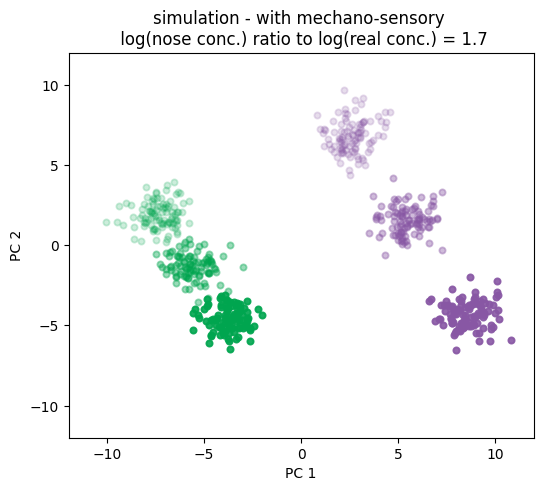

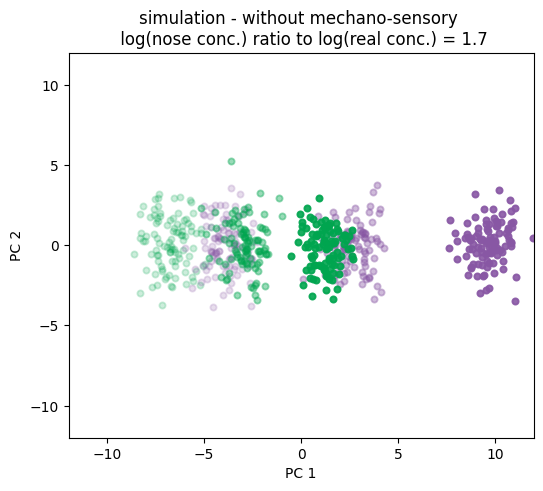

In [14]:
from sklearn.decomposition import PCA
import math
from numpy.random import poisson
import math

colors_set = pd.DataFrame({'R': [0, 0.6471, 0.3098], 'S': [0.5333, 0.3412, 0.6431]})
marker_size = 20;
marker_alpha = [.2, .4, .9];
pca_xlim = (-12, 12)
pca_ylim = (-12, 12)

epsilon = .025
c_set = [0.33, .66, 1]
kappa = .7;

m2_theta = model_coeff_dict['beta'][:, odor_id]*kappa
m1_theta = model_coeff_dict['beta'][:, odor_id]*kappa
design_mat = np.empty((0, 3))
for ci in c_set:
    design_mat = np.vstack((design_mat,
        np.vstack((np.tile([0, ci, 0], (num_of_events, 1)),
        np.tile([1, ci, ci], (num_of_events, 1))))))



resp_mat_m1= np.empty((design_mat.shape[0], numbr_of_units))
for nn in range(numbr_of_units):
    ni = fully_mix_selective_units[nn][0]
    fr_lambda = (design_mat @ np.array(
        [m1_alpha[ni], m1_beta[ni], m1_theta[ni]]) + m1_conctant[ni])
    if np.sum(fr_lambda < 0) > 0:    
        fr_lambda = fr_lambda  + np.abs(np.min(fr_lambda)) + epsilon

    neuron_resp = poisson(fr_lambda)
    resp_mat_m1[:, nn] = neuron_resp
    
resp_mat_m2= np.empty((design_mat.shape[0], numbr_of_units))
for nn in range(numbr_of_units):
    ni = fully_mix_selective_units[nn][0]
    fr_lambda = (design_mat @ np.array(
        [m2_alpha[ni], m2_beta[ni], m2_theta[ni]]) + m2_conctant[ni])
    if np.sum(fr_lambda < 0) > 0:    
        fr_lambda = fr_lambda  + np.abs(np.min(fr_lambda)) + epsilon

    neuron_resp = poisson(fr_lambda)
    resp_mat_m2[:, nn] = neuron_resp
    
PCA_score_m1 = PCA(3).fit_transform(stats.zscore(resp_mat_m1))
f1, ax = plt.subplots()
for ci in range(np.shape(c_set)[0]):
    ax.scatter(PCA_score_m1[(design_mat[:, 0] == 0) & (design_mat[:, 1] == c_set[ci]), 0], 
               PCA_score_m1[(design_mat[:, 0] == 0) & (design_mat[:, 1] == c_set[ci]), 1], 
               marker_size, edgecolors=colors_set['R'], facecolors=colors_set['R'], 
               linewidth=1.3, alpha=marker_alpha[ci])
    
    ax.scatter(PCA_score_m1[(design_mat[:, 0] == 1) & (design_mat[:, 1] == c_set[ci]), 0], 
               PCA_score_m1[(design_mat[:, 0] == 1) & (design_mat[:, 1] == c_set[ci]), 1], 
               marker_size, edgecolors=colors_set['S'], facecolors=colors_set['S'], 
               linewidth=1.3, alpha=marker_alpha[ci])
ax.set_xlim(pca_xlim)
ax.set_ylim(pca_ylim)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_title("simulation - with mechano-sensory \n log(nose conc.) ratio to log(real conc.) = 1.7")
f1.set_size_inches(6, 5)
f1.savefig(result_save_path / "mech_pca.png")
f1.savefig(result_save_path / "mech_pca.pdf")
f1.savefig(result_save_path / "mech_pca.svg", format="svg")
plt.show()

PCA_score_m2 = PCA(3).fit_transform(stats.zscore(resp_mat_m2))
f2, ax = plt.subplots()
for ci in range(np.shape(c_set)[0]):
    ax.scatter(PCA_score_m2[(design_mat[:, 0] == 0) & (design_mat[:, 1] == c_set[ci]), 0], 
               PCA_score_m2[(design_mat[:, 0] == 0) & (design_mat[:, 1] == c_set[ci]), 1], 
               marker_size, edgecolors=colors_set['R'], facecolors=colors_set['R'], 
               linewidth=1.3, alpha=marker_alpha[ci])
    
    ax.scatter(PCA_score_m2[(design_mat[:, 0] == 1) & (design_mat[:, 1] == c_set[ci]), 0], 
               PCA_score_m2[(design_mat[:, 0] == 1) & (design_mat[:, 1] == c_set[ci]), 1], 
               marker_size, edgecolors=colors_set['S'], facecolors=colors_set['S'], 
               linewidth=1.3, alpha=marker_alpha[ci])
ax.set_xlim(pca_xlim)
ax.set_ylim(pca_ylim)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_title("simulation - without mechano-sensory \n log(nose conc.) ratio to log(real conc.) = 1.7")
f2.savefig(result_save_path / "no_mech_pca.png")
f2.savefig(result_save_path / "no_mech_pca.pdf")
f2.savefig(result_save_path / "no_mech_pca.svg", format="svg")
f2.set_size_inches(6, 5)


In [11]:
from numpy.random import poisson
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve, ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import random
import math
vector = np.vectorize(np.int_)

n_fold = 10
best_c = 1
epsilon = .025
c_set = [0.33, .66, 1]
num_of_simulation = 500

my_decision_function_shape = 'ovr'
kappa_set  = np.linspace(0, 1, 20);

    
mix_acc = np.empty((len(kappa_set), 2, num_of_simulation));
slow_acc = np.empty((len(kappa_set), 2, num_of_simulation));
fast_acc = np.empty((len(kappa_set), 2, num_of_simulation));
fast2slow_acc = np.empty((len(kappa_set), 2, num_of_simulation));
slow2fast_acc = np.empty((len(kappa_set), 2, num_of_simulation));
for ns in range(num_of_simulation):
    for c_i in range(len(kappa_set)):
        kappa = kappa_set[c_i]
        m2_theta = model_coeff_dict['beta'][:, odor_id]*kappa
        m1_theta = model_coeff_dict['beta'][:, odor_id]*kappa
        
        
        design_mat = np.empty((0, 3))
        for ci in c_set:
            design_mat = np.vstack((design_mat,
                np.vstack((np.tile([0, ci, 0], (num_of_events, 1)),
                np.tile([1, ci,  ci], (num_of_events, 1))))))
        
        conc_labels = np.empty(np.shape(design_mat[:, 1]))
        c = 0
        for ci in c_set:
            conc_labels[design_mat[:, 1] == ci] = c
            c = c+1
            
        for m_type in range(2):

            resp_mat= np.empty((design_mat.shape[0], numbr_of_units))
            if m_type == 0:
                for nn in range(numbr_of_units):
                    ni = fully_mix_selective_units[nn][0]
                    fr_lambda = (design_mat @ np.array(
                        [m1_alpha[ni], m1_beta[ni], m1_theta[ni]]) + m1_conctant[ni])
                    if np.sum(fr_lambda < 0) > 0:    
                        fr_lambda = fr_lambda  + np.abs(np.min(fr_lambda)) + epsilon

                    neuron_resp = poisson(fr_lambda)
                    resp_mat[:, nn] = neuron_resp

            elif m_type == 1:
                for nn in range(numbr_of_units):
                    ni = fully_mix_selective_units[nn][0]
                    fr_lambda = (design_mat @ np.array(
                        [m2_alpha[ni], m2_beta[ni], m2_theta[ni]]) + m2_conctant[ni])
                    if np.sum(fr_lambda < 0) > 0:    
                        fr_lambda = fr_lambda  + np.abs(np.min(fr_lambda)) + epsilon

                    neuron_resp = poisson(fr_lambda)
                    resp_mat[:, nn] = neuron_resp


            model_data =  resp_mat # this line is here becuse of inital code that I was constractring the final version
            #model_data = PCA(3).fit_transform(stats.zscore(resp_mat))
            
            clf_mix = svm.SVC(kernel='linear', decision_function_shape= my_decision_function_shape) 
            clf_fast = svm.SVC(kernel='linear', decision_function_shape= my_decision_function_shape)
            clf_slow = svm.SVC(kernel='linear', decision_function_shape= my_decision_function_shape)

            # Create the k-fold cross-validator
            kfold = KFold(n_splits=n_fold, shuffle = True)

            X_fast =  model_data[design_mat[:, 0] == 1, :]
            y_fast =  conc_labels[design_mat[:, 0] == 1]

            X_slow =  model_data[design_mat[:, 0] == 0, :]
            y_slow =  conc_labels[design_mat[:, 0] == 0]
            
            all_fast_idx = np.empty((0,0));
            for c_idx in c_set:
                single_event_idx = np.argwhere(
               (design_mat[:, 0] == 1) & (design_mat[:, 1] == c_idx))

                selected_idx = single_event_idx[
                    np.sort(np.random.choice(num_of_events, size=int(num_of_events/2), replace=False))]
                all_fast_idx = np.append(all_fast_idx, selected_idx)

            all_slow_idx = np.empty((0,0));
            for c_idx in c_set:
                single_event_idx = np.argwhere(
               (design_mat[:, 0] == 0) & (design_mat[:, 1] == c_idx))

                selected_idx = single_event_idx[
                    np.sort(np.random.choice(num_of_events, size=int(num_of_events/2), replace=False))]
                all_slow_idx = np.append(all_slow_idx, selected_idx)
            
            all_selected_idx = np.append(all_fast_idx, all_slow_idx)
            
            X_mix = model_data[vector(all_selected_idx), :]
            y_mix = conc_labels[vector(all_selected_idx)]
            
            
            # Initialize the list of scores
            scoresMix = []
            scoresFast = []
            scoresSlow = []
            scoresFast2Slow = []
            scoresSlow2Fast = []

            indicex_mix = [];
            for train_index, test_index in kfold.split(X_fast):
                indicex_mix.append((train_index, test_index))

            indicex_fast = [];
            for train_index, test_index in kfold.split(X_fast):
                indicex_fast.append((train_index, test_index))

            indices_slow = [];
            for train_index, test_index in kfold.split(X_slow):
                indices_slow.append((train_index, test_index))

            # Iterate over the folds
            for i in range(n_fold): 
                fast_train_index, fast_test_index = indicex_fast[i]
                slow_train_index, slow_test_index = indices_slow[i]
                mix_train_index, mix_test_index = indicex_mix[i]

                # Split the training data into training and validation sets
                mix_X_train_fold, mix_X_test_fold = X_mix[mix_train_index], X_mix[mix_test_index]
                mix_y_train_fold, mix_y_test_fold = y_mix[mix_train_index], y_mix[mix_test_index]

                fast_X_train_fold, fast_X_test_fold = X_fast[fast_train_index], X_fast[fast_test_index]
                fast_y_train_fold, fast_y_test_fold = y_fast[fast_train_index], y_fast[fast_test_index]

                slow_X_train_fold, slow_X_test_fold = X_slow[slow_train_index], X_slow[slow_test_index]
                slow_y_train_fold, slow_y_test_fold = y_slow[slow_train_index], y_slow[slow_test_index]

                # (order of operations)
                # Create the SVM model
                # Fit the model on the training data
                # Scale the training data
                # Evaluate the model on the validation data
                # Append the score to the list of scores


                scaler_mix = StandardScaler()
                mix_X_train_fold_scaled = scaler_mix.fit_transform(mix_X_train_fold)
                mix_X_test_fold_scaled = scaler_mix.transform(mix_X_test_fold)
                clf_mix.fit(mix_X_train_fold_scaled, mix_y_train_fold)   
                scoreMix = clf_mix.score(mix_X_test_fold_scaled, mix_y_test_fold)   
                scoresMix.append(scoreMix)

                scaler_fast = StandardScaler()
                fast_X_train_fold_scaled = scaler_fast.fit_transform(fast_X_train_fold)
                fast_X_test_fold_scaled = scaler_fast.transform(fast_X_test_fold)
                clf_fast.fit(fast_X_train_fold_scaled, fast_y_train_fold)   
                scoreFast = clf_fast.score(fast_X_test_fold_scaled, fast_y_test_fold)   
                scoresFast.append(scoreFast)


                scaler_slow = StandardScaler()
                slow_X_train_fold_scaled = scaler_slow.fit_transform(slow_X_train_fold)
                slow_X_test_fold_scaled = scaler_slow.transform(slow_X_test_fold)
                clf_slow.fit(slow_X_train_fold_scaled, slow_y_train_fold)   
                scoreSlow = clf_slow.score(slow_X_test_fold_scaled, slow_y_test_fold)   
                scoresSlow.append(scoreSlow)

                fast_X_test_fold_scaled_with_slow = scaler_slow.transform(fast_X_test_fold)
                scoreSlow2Fast = clf_slow.score(fast_X_test_fold_scaled_with_slow, fast_y_test_fold)   
                scoresSlow2Fast.append(scoreSlow2Fast)

                slow_X_test_fold_scaled_with_fast = scaler_fast.transform(slow_X_test_fold)
                scoreFast2Slow = clf_fast.score(slow_X_test_fold_scaled_with_fast, slow_y_test_fold)   
                scoresFast2Slow.append(scoreFast2Slow)

            mix_acc[c_i, m_type, ns] = np.mean(scoresMix)
            slow_acc[c_i, m_type, ns] = np.mean(scoreSlow)
            fast_acc[c_i, m_type, ns] = np.mean(scoreFast)
            fast2slow_acc[c_i, m_type, ns] = np.mean(scoreFast2Slow)
            slow2fast_acc[c_i, m_type, ns] = np.mean(scoreSlow2Fast)

mix_acc_avg = np.mean(mix_acc, axis = 2) * 100
slow_acc_avg = np.mean(slow_acc, axis = 2) * 100
fast_acc_avg = np.mean(fast_acc, axis = 2) * 100
fast2slow_acc_avg = np.mean(fast2slow_acc, axis = 2) * 100
slow2fast_acc_avg = np.mean(slow2fast_acc, axis = 2) * 100

fast2slow_acc_std = np.std(fast2slow_acc, axis = 2) * 100
slow2fast_acc_std = np.std(slow2fast_acc, axis = 2) * 100

In [12]:
mean_of_mix_with_mech =  mix_acc_avg[:, 0] 
mean_of_mix_without_mech =  mix_acc_avg[:, 1] 

mean_of_cis_with_mech = np.mean(np.stack(
    (slow_acc_avg[:, 0], fast_acc_avg[:, 0]), axis=1), axis = 1) 
mean_of_cis_without_mech = np.mean(np.stack(
    (slow_acc_avg[:, 1], fast_acc_avg[:, 1]), axis=1), axis = 1) 

mean_of_trance_with_mech = np.mean(np.stack(
    (fast2slow_acc_avg[:, 0], slow2fast_acc_avg[:, 0]), axis=1), axis = 1)
mean_of_trance_without_mech = np.mean(np.stack(
    (fast2slow_acc_avg[:, 1], slow2fast_acc_avg[:, 1]), axis=1), axis = 1) 


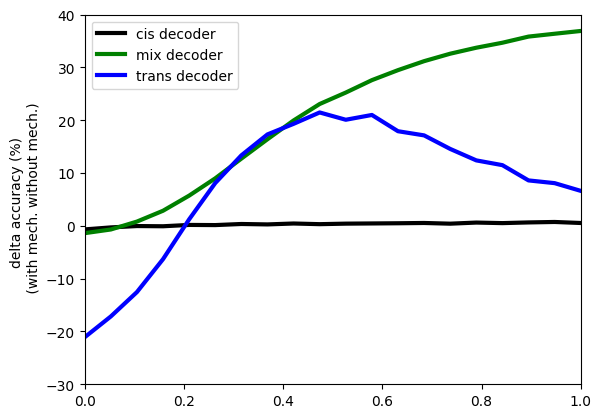

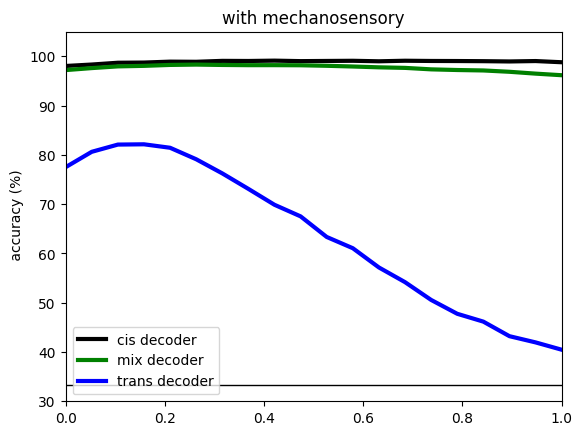

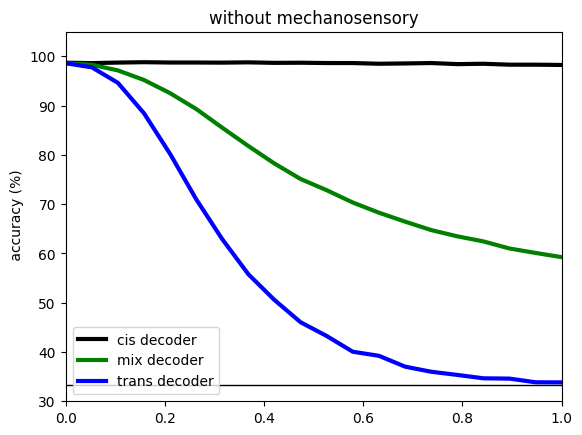

In [13]:
kappa_set_ratio = kappa_set

import mat73
model_coeff_dict = mat73.loadmat(data_set_path / 'fig5_coeff_for_simulation.mat')



f1, ax = plt.subplots(frameon=False)
ax.plot(kappa_set_ratio,
       mean_of_cis_with_mech - mean_of_cis_without_mech,
       color = 'k', linewidth = 3)
ax.plot(kappa_set_ratio,
       mean_of_mix_with_mech - mean_of_mix_without_mech,
       color = 'g', linewidth = 3)
ax.plot(kappa_set_ratio,
       mean_of_trance_with_mech - mean_of_trance_without_mech,
       color = 'b', linewidth = 3)

ax.set_ylim((-30, 40))
ax.set_title("simulation - without mechano-sensory \n log(nose conc.) ratio to log(real conc.) = 1.5")
ax.set_ylabel("delta accuracy (%) \n (with mech. without mech.)")
ax.set_title('')
ax.set_xlim((0, 1))
ax.legend(["cis decoder", "mix decoder", "trans decoder"],
         loc="upper left")


f1.savefig(result_save_path / "mech_noMech_delta.png")
f1.savefig(result_save_path / "mech_noMech_delta.pdf")
f1.savefig(result_save_path / "mech_noMech_delta.svg", format="svg")
plt.show()
#------------------------------------
f2, ax = plt.subplots()
ax.plot(kappa_set_ratio,
       mean_of_cis_with_mech,
       color = 'k', linewidth = 3)
ax.plot(kappa_set_ratio,
       mean_of_mix_with_mech,
       color = 'g', linewidth = 3)
ax.plot(kappa_set_ratio,
       mean_of_trance_with_mech,
       color = 'b', linewidth = 3)


ax.plot([0, 1], [100/len(c_set), 100/len(c_set)],
       color = 'k', linewidth = 1)
plt.legend(["cis decoder", "mix decoder", "trans decoder"],
         loc="lower left")
ax.set_ylim((30, 105))
ax.set_title("simulation - without mechano-sensory \n log(nose conc.) ratio to log(real conc.) = 1.5")
ax.set_ylabel(' accuracy (%)')
ax.set_title('with mechanosensory')
ax.set_xlim((0, 1))

f2.savefig(result_save_path / "mech_acc.png")
f2.savefig(result_save_path / "mech_acc.pdf")
f2.savefig(result_save_path / "mech_acc.svg", format="svg")
plt.show()
#-----------------
f3, ax = plt.subplots()
ax.plot(kappa_set_ratio,
       mean_of_cis_without_mech,
       color = 'k', linewidth = 3)
ax.plot(kappa_set_ratio,
       mean_of_mix_without_mech,
       color = 'g', linewidth = 3)
ax.plot(kappa_set_ratio,
       mean_of_trance_without_mech,
       color = 'b', linewidth = 3)

ax.plot([0, 1], [100/len(c_set), 100/len(c_set)],
       color = 'k', linewidth = 1)

ax.set_ylim((30, 105))
plt.legend(["cis decoder", "mix decoder", "trans decoder"],
         loc="lower left")
ax.set_title("simulation - without mechano-sensory \n log(nose conc.) ratio to log(real conc.) = 1.5")
ax.set_ylabel(' accuracy (%)')
ax.set_title('without mechanosensory')
ax.set_xlim((0, 1))

f3.savefig(result_save_path / "no_mech_acc.png")
f3.savefig(result_save_path / "no_mech_acc.pdf")
f3.savefig(result_save_path / "no_mech_acc.svg", format="svg")
plt.show()
